<a href="https://colab.research.google.com/github/muhammedemiracarkan/DSAProject/blob/main/DSAProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📚 Collection of Data

In this study, data were collected from various reliable sources that record environmental pollution indicators and heart disease statistics across different states.

The dataset includes the following key variables:
- **Pollution Index:** A composite measure reflecting overall air pollution.
- **O₃ Mean (Ozone) Normalized**
- **CO Mean (Carbon Monoxide) Normalized**
- **SO₂ Mean (Sulfur Dioxide) Normalized**
- **NO₂ Mean (Nitrogen Dioxide) Normalized**
- **Heart Disease Index:** An aggregated score combining heart failure and coronary heart disease rates.

> The purpose of collecting this data is to investigate whether environmental pollution has a measurable impact on cardiovascular health outcomes across different regions.

The dataset was manually curated and cleaned to ensure **consistency**, **completeness**, and **relevance** to the research objective.



In [68]:
import pandas as pd

df = pd.read_csv("pollution_2000_2023.csv")

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year

filtered_df = df[(df['Year'] >= 2004) & (df['Year'] <= 2013)].copy()

for col in ['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean']:
    filtered_df.loc[:, col] = pd.to_numeric(filtered_df[col], errors='coerce')

state_means = filtered_df.groupby('State')[['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean']].mean().reset_index()

state_means.head()

,State,O3 Mean,CO Mean,SO2 Mean,NO2 Mean
0,Alabama,0.012687,0.211873,0.771913,12.065635
1,Arizona,0.027939,0.454021,1.330709,18.444316
2,Arkansas,0.028642,0.447595,1.471921,10.016807
3,California,0.028164,0.403301,1.075210,12.941520
4,Colorado,0.026382,0.449576,1.577529,19.775877


Endeks Aralığı  | Sınıf

0.0 – 0.2       | Çok Temiz

0.2 – 0.4       | Temiz

0.4 – 0.6       | Orta

0.6 – 0.8       | Kirli

0.8 – 1.0       | Çok Kirli

In [70]:
for col in ['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean']:
    min_val = state_means[col].min()
    max_val = state_means[col].max()
    state_means[f'{col}_norm'] = (state_means[col] - min_val) / (max_val - min_val)

w_NO2 = 0.35
w_SO2 = 0.30
w_CO  = 0.20
w_O3  = 0.15

state_means['Pollution Index'] = (
    w_NO2 * state_means['NO2 Mean_norm'] +
    w_SO2 * state_means['SO2 Mean_norm'] +
    w_CO  * state_means['CO Mean_norm'] +
    w_O3  * state_means['O3 Mean_norm']
)
state_means.head()

,State,O3 Mean,CO Mean,SO2 Mean,NO2 Mean,O3 Mean_norm,CO Mean_norm,SO2 Mean_norm,NO2 Mean_norm,Pollution Index
0,Alabama,0.012687,0.211873,0.771913,12.065635,0.000000,0.145317,0.129214,0.591978,0.275020
1,Arizona,0.027939,0.454021,1.330709,18.444316,0.535497,0.506844,0.268966,0.929534,0.587720
2,Arkansas,0.028642,0.447595,1.471921,10.016807,0.560204,0.497250,0.304282,0.483555,0.444010
3,California,0.028164,0.403301,1.075210,12.941520,0.543415,0.431120,0.205067,0.638329,0.452672
4,Colorado,0.026382,0.449576,1.577529,19.775877,0.480837,0.500208,0.330694,1.000000,0.621375


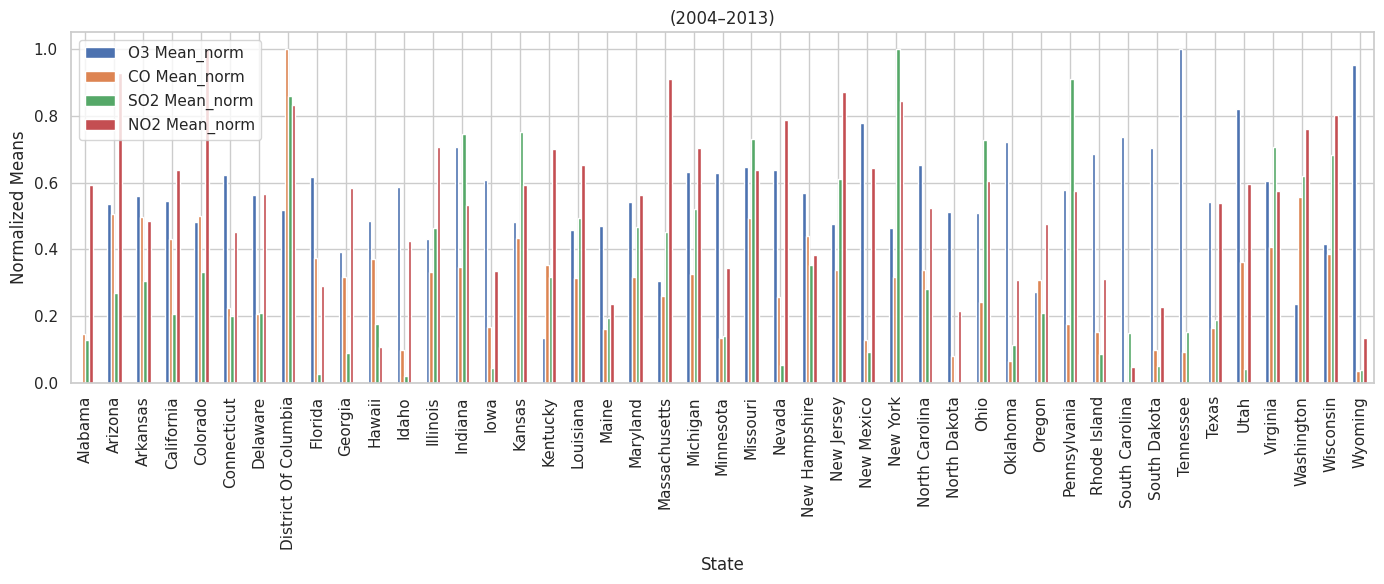

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
state_means.set_index("State")[['O3 Mean_norm', 'CO Mean_norm', 'SO2 Mean_norm', 'NO2 Mean_norm']].plot(kind='bar', figsize=(14, 6))
plt.title("(2004–2013)")
plt.ylabel("Normalized Means")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

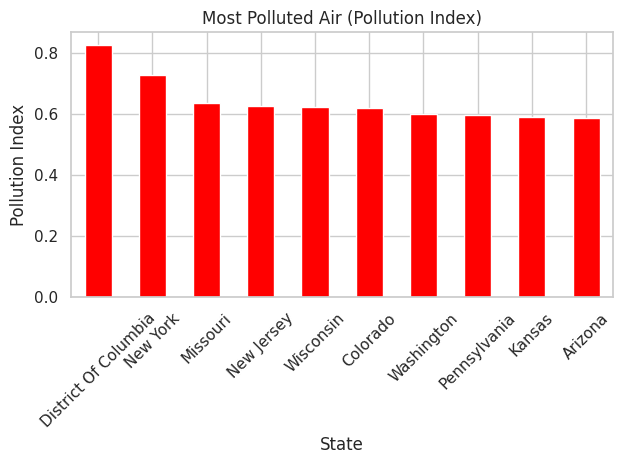

In [72]:
top_polluted = state_means.sort_values('Pollution Index', ascending=False).head(10)
top_polluted.plot(kind='bar', x='State', y='Pollution Index', legend=False, color='red')
plt.title("Most Polluted Air (Pollution Index)")
plt.ylabel("Pollution Index")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

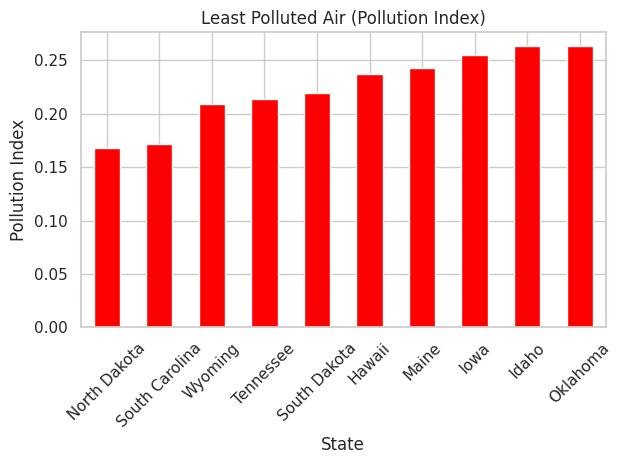

In [73]:
top_polluted = state_means.sort_values('Pollution Index', ascending=True).head(10)
top_polluted.plot(kind='bar', x='State', y='Pollution Index', legend=False, color='red')
plt.title("Least Polluted Air (Pollution Index)")
plt.ylabel("Pollution Index")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

heart_df = pd.read_csv("heart_disease_data.csv")

heart_df_cleaned = heart_df[
    (heart_df['LocationDesc'] != 'United States') &
    (heart_df['Break_Out'] == 'Overall') &
    (heart_df['Topic'].isin(['Heart Failure', 'Coronary Heart Disease']))
][['Year', 'LocationDesc', 'Topic', 'Data_Value']]

heart_pivot = heart_df_cleaned.pivot_table(
    index=['LocationDesc', 'Year'],
    columns='Topic',
    values='Data_Value'
).reset_index()

heart_pivot['Heart Disease Index'] = 0.5 * heart_pivot['Heart Failure'] + 0.5 * heart_pivot['Coronary Heart Disease']

heart_state_avg = heart_pivot.groupby('LocationDesc')[['Heart Disease Index', 'Heart Failure', 'Coronary Heart Disease']].mean().reset_index()
heart_state_avg.rename(columns={'LocationDesc': 'State'}, inplace=True)

merged_df = pd.merge(state_means, heart_state_avg, on='State', how='inner')
merged_df = merged_df.drop(columns=['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean'])
merged_df.head()

,State,O3 Mean_norm,CO Mean_norm,SO2 Mean_norm,NO2 Mean_norm,Pollution Index,Heart Disease Index,Heart Failure,Coronary Heart Disease
0,Alabama,0.000000,0.145317,0.129214,0.591978,0.275020,14.904,23.328,6.48
1,Arizona,0.535497,0.506844,0.268966,0.929534,0.587720,10.919,14.998,6.84
2,Arkansas,0.560204,0.497250,0.304282,0.483555,0.444010,14.907,22.174,7.64
3,California,0.543415,0.431120,0.205067,0.638329,0.452672,11.410,16.910,5.91
4,Colorado,0.480837,0.500208,0.330694,1.000000,0.621375,9.244,13.528,4.96


# 🔎 Exploratory Data Analysis (EDA)

Before conducting formal statistical tests, an Exploratory Data Analysis (EDA) was performed to understand the structure and patterns within the dataset.

The main steps of the EDA process were:

## 📊 1. Descriptive Statistics
- Measures such as **mean**, **median**, **minimum**, **maximum**, and **standard deviation** were calculated for all variables to understand their distributions.

## 📈 2. Distribution Analysis
- **Shapiro-Wilk tests** were performed to assess the normality of continuous variables.
- This determined whether **parametric** (Pearson) or **non-parametric** (Spearman) correlation tests would be appropriate.

## 🖼️ 3. Visualization
- **Scatter plots** were generated to visually inspect the relationships between pollution levels and heart disease rates.
- **Heatmaps** were created to analyze the correlation matrix between variables.
- **Boxplots** were used to compare pollution indices across different heart disease severity levels.

## 🔗 4. Correlation Analysis
- **Pearson** or **Spearman** correlation coefficients were calculated depending on the results of the normality tests.
- This provided an initial quantification of the relationship between pollution and heart disease.

---

> 📝 Through EDA, initial insights suggested potential relationships between certain pollution indicators (e.g., CO and NO₂ levels) and the prevalence of heart disease, warranting further formal hypothesis testing.

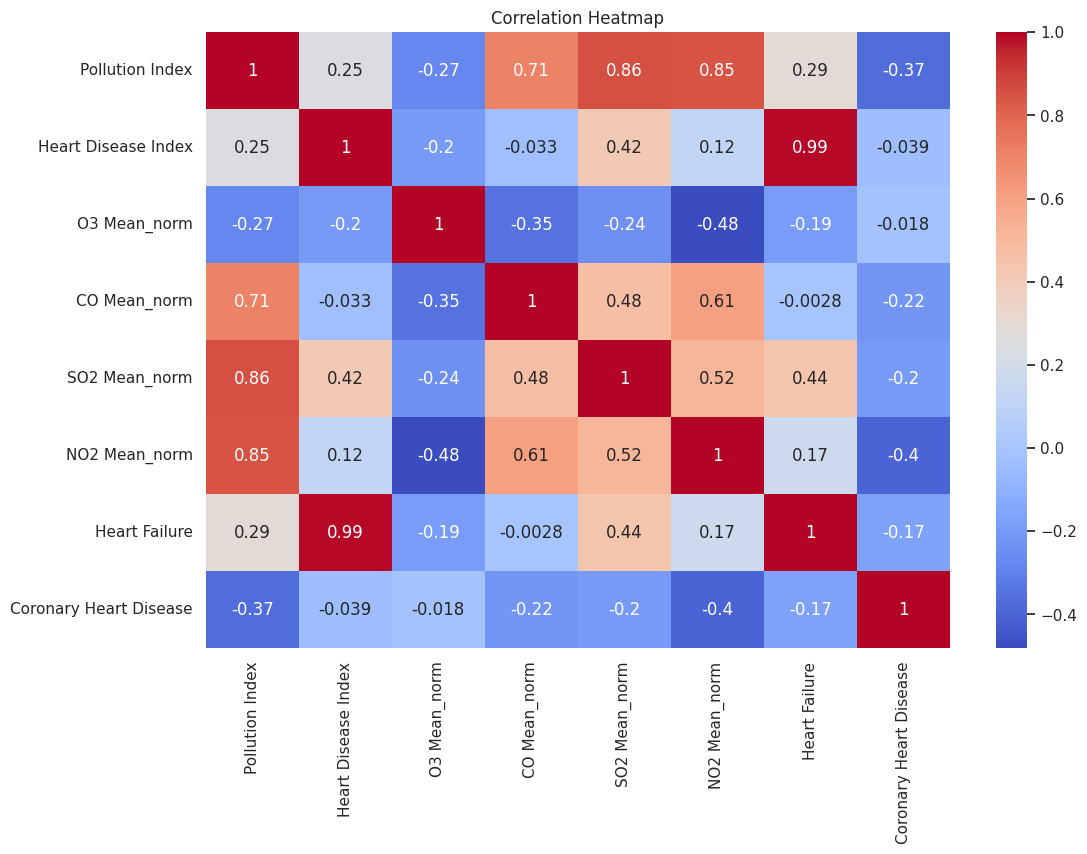

In [58]:
plt.figure(figsize=(12, 8))
sns.heatmap(merged_df[['Pollution Index', 'Heart Disease Index',	'O3 Mean_norm',	'CO Mean_norm',	'SO2 Mean_norm',	'NO2 Mean_norm','Heart Failure',	'Coronary Heart Disease']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

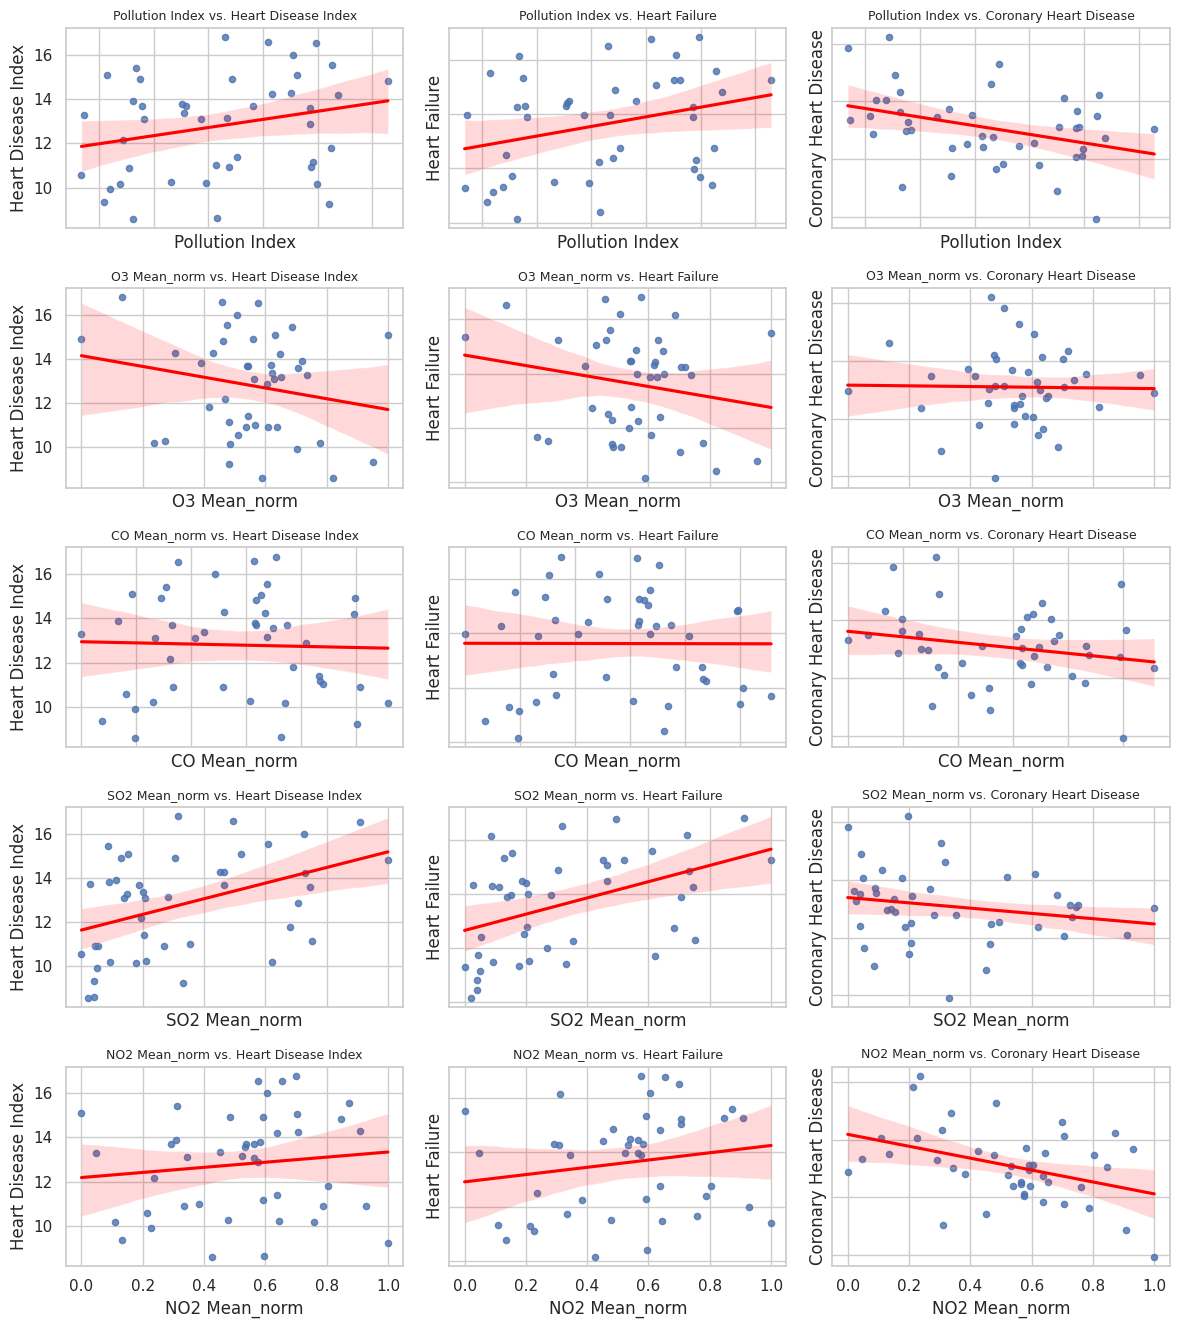

In [66]:
import itertools
pollution_features = ["Pollution Index", "O3 Mean_norm", "CO Mean_norm", "SO2 Mean_norm", "NO2 Mean_norm"]
disease_features = ["Heart Disease Index", "Heart Failure", "Coronary Heart Disease"]
fig, axes = plt.subplots(len(pollution_features), len(disease_features), figsize=(12, 14))
for i, pol in enumerate(pollution_features):
    for j, dis in enumerate(disease_features):
        ax = axes[i, j]
        sns.regplot(data=merged_df, x=pol, y=dis, ax=ax, scatter_kws={"s": 20}, line_kws={"color": "red"})
        ax.tick_params(labelbottom=(i == len(pollution_features) - 1), labelleft=(j == 0))
        ax.set_title(f"{pol} vs. {dis}", fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

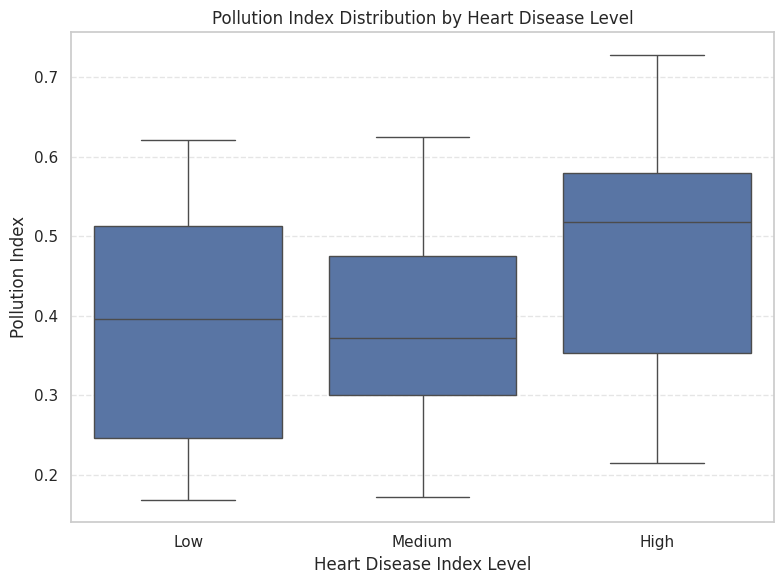

In [84]:
# Kalp hastalığı indeksini üç seviyeye ayıralım
merged_df["Heart Disease Level"] = pd.qcut(merged_df["Heart Disease Index"], q=3, labels=["Low", "Medium", "High"])

plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_df, x="Heart Disease Level", y="Pollution Index")
plt.title("Pollution Index Distribution by Heart Disease Level")
plt.xlabel("Heart Disease Index Level")
plt.ylabel("Pollution Index")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

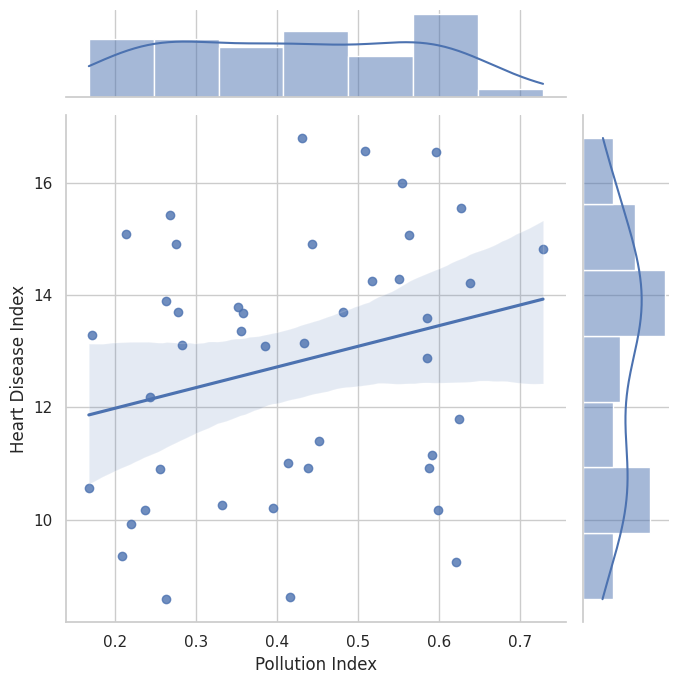

In [85]:
sns.jointplot(data=merged_df, x='Pollution Index', y='Heart Disease Index', kind='reg', height=7)
plt.show()

HYPOTHESIS TESTS

🔵 Null Hypothesis (H₀):
There is no statistically significant relationship between the Pollution Index and the Heart Disease Index.
In other words, variations in pollution levels are not associated with changes in heart disease rates.

🔴 Alternative Hypothesis (H₁):
There is a statistically significant relationship between the Pollution Index and the Heart Disease Index.
This implies that changes in pollution levels may be linked to differences in heart disease rates.

Further Clarification:
Null Hypothesis (H₀) assumes that any observed association between pollution and heart disease is purely due to random chance.

Alternative Hypothesis (H₁) suggests that the association observed is real and not random, indicating that pollution could potentially influence heart disease outcomes.

We will use statistical tests to decide whether there is enough evidence to reject the null hypothesis in favor of the alternative hypothesis.
The decision is based on the p-value obtained from the test:

If p-value < 0.05, we reject H₀ (significant relationship exists).

If p-value ≥ 0.05, we fail to reject H₀ (no significant relationship found).

In [87]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

pollution_normality = stats.shapiro(merged_df["Pollution Index"])
heart_normality = stats.shapiro(merged_df["Heart Disease Index"])

print(f"Pollution Index Normality Test p-value: {pollution_normality.pvalue:.4f}")
print(f"Heart Disease Index Normality Test p-value: {heart_normality.pvalue:.4f}")

if pollution_normality.pvalue > 0.05 and heart_normality.pvalue > 0.05:
    corr_test = stats.pearsonr(merged_df["Pollution Index"], merged_df["Heart Disease Index"])
    test_used = "Pearson"
else:
    corr_test = stats.spearmanr(merged_df["Pollution Index"], merged_df["Heart Disease Index"])
    test_used = "Spearman"

print(f"{test_used} Correlation Coefficient: {corr_test.correlation:.4f}")
print(f"{test_used} Test p-value: {corr_test.pvalue:.4f}")
alpha = 0.05
if corr_test.pvalue < alpha:
    print("Result: H₀ is rejected. There is a statistically significant relationship between the variables.")
else:
    print("Result: H₀ is failed to reject. No statistically significant relationship was found.")


Pollution Index Normality Test p-value: 0.0373
Heart Disease Index Normality Test p-value: 0.1249
Spearman Correlation Coefficient: 0.2615
Spearman Test p-value: 0.0865
Sonuç: H₀ kabul edilir. Anlamlı bir ilişki bulunamamıştır.
